## Media Viewership Case Study

In [1]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing dataset
media = pd.read_csv('mediacompany.csv',encoding='utf-8')

In [3]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [4]:
media = media.drop('Unnamed: 7',axis = 1)

In [5]:
# Converting date to Pandas datetime format
media['Date'] = pd.to_datetime(media['Date'])

In [6]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [7]:
# Deriving "days since the show started"
from datetime import date
d0 = pd.to_datetime("2/28/2017")
d1 = media['Date']
delta = d1 - d0
media['day']= delta

In [8]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [9]:
media.tail()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,76 days
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,77 days
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,78 days
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,79 days
79,2017-05-19,108961,1746735,2279036,1246026846,1,0,80 days


In [10]:
# Cleaning days
media['day'] = media['day'].astype('str')
media['day'] = media['day'].map(lambda x: x[0:2])
media['day'] = media['day'].astype('int')

In [11]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


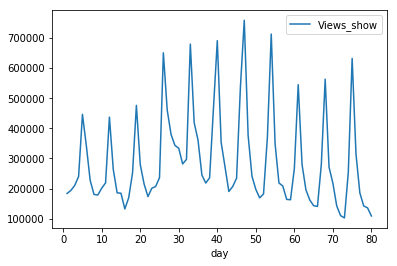

In [12]:
# days vs Views_show
media.plot.line(x='day', y='Views_show');

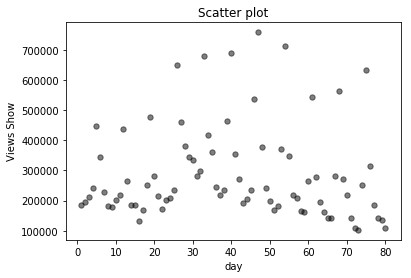

In [13]:
# Scatter Plot (days vs Views_show)
colors = (0,0,0)
area = np.pi*9
plt.scatter(media.day, media.Views_show, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('day')
plt.ylabel('Views Show')
plt.show()

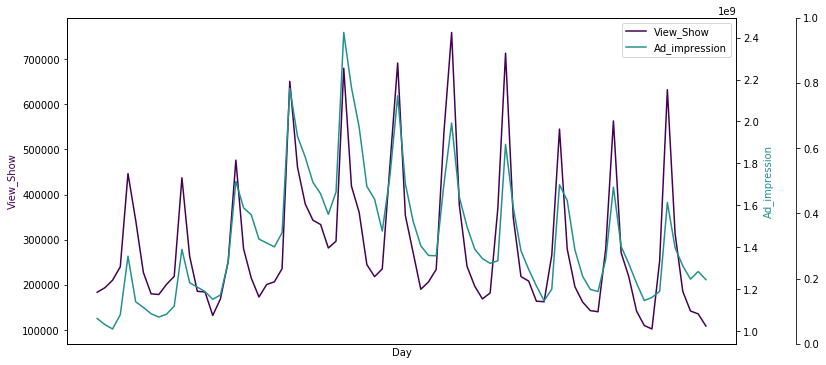

In [14]:
# plot for days vs Views_show and days vs Ad_impressions
fig = plt.figure(figsize=(12,6))
host = fig.add_subplot(111)

part1 = host.twinx()
part2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
part1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(.5)

p1, = host.plot(media.day,media.Views_show, color=color1,label="View_Show")
p2, = part1.plot(media.day,media.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

part2.spines['right'].set_position(('outward', 60))                       
part2.xaxis.set_ticks([])

host.yaxis.label.set_color(p1.get_color())
part1.yaxis.label.set_color(p2.get_color())

plt.savefig("Days Vs (Views Show, Ad_Impression).png", bbox_inches='tight')

In [15]:
# Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable
media['weekday'] = (media['day']+3)%7
media.weekday.replace(0,7, inplace=True)
media['weekday'] = media['weekday'].astype('int')
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


#### Running first model (lm1) Weekday & visitors 

In [16]:
X = media[['Visitors','weekday']]
y = media['Views_show']

In [17]:
import statsmodels.api as sm
#sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)

lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           8.01e-12
Time:                        19:11:54   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [18]:
# create Weekend variable, with value 1 at weekends and 0 at weekdays
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else :return 0
    return i

media['weekend']=[cond(i) for i in media['day']]

In [19]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


#### Running second model (lm2) visitors & weekend

In [20]:
X = media[['Visitors','weekend']]
y = media['Views_show']

In [21]:
X = sm.add_constant(X)
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           2.51e-12
Time:                        19:11:57   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

#### Running third model (lm3) visitors, weekend & Character_A

In [22]:
X = media[['Visitors','weekend','Character_A']]
y = media['Views_show']

In [23]:
X = sm.add_constant(X)
lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           1.53e-14
Time:                        19:11:57   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [24]:
# Create lag variable
media['Lag_Views'] = np.roll(media['Views_show'], 1)

In [25]:
media.tail()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,76,2,0,631962
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,77,3,0,313945
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,78,4,0,185689
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,79,5,0,142260
79,2017-05-19,108961,1746735,2279036,1246026846,1,0,80,6,0,135871


In [26]:
media.Lag_Views.replace(108961,0, inplace=True)

In [27]:
media.tail()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,76,2,0,631962
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,77,3,0,313945
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,78,4,0,185689
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,79,5,0,142260
79,2017-05-19,108961,1746735,2279036,1246026846,1,0,80,6,0,135871


#### Running fourth model (lm4) visitors, Character_A, Lag_views & weekend

In [28]:
X = media[['Visitors','Character_A','Lag_Views','weekend']]
y = media['Views_show']

In [29]:
X = sm.add_constant(X)
lm_4 = sm.OLS(y,X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           3.16e-21
Time:                        19:12:00   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

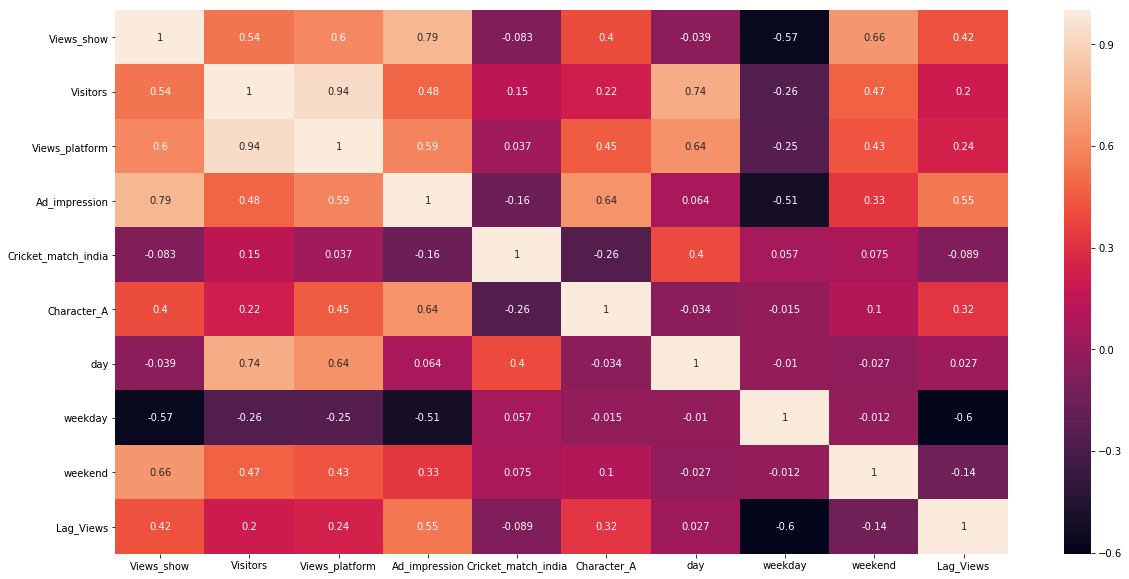

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(media.corr(),annot = True);

#### Running fifth model (lm5) Character_A, weekend & Views_platform

In [31]:
X = media[['weekend','Character_A','Views_platform']]
y = media['Views_show']

In [32]:
X = sm.add_constant(X)
lm_5 = sm.OLS(y,X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           3.59e-15
Time:                        19:12:00   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

#### Running sixth model (lm6) Character_A, weekend & Visitors

In [33]:
X = media[['weekend','Character_A','Visitors']]
y = media['Views_show']

In [34]:
X = sm.add_constant(X)
lm_6 = sm.OLS(y,X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           1.53e-14
Time:                        19:12:01   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

#### Running seventh model (lm7) Character_A, weekend, Visitors & Ad_impressions

In [35]:
X = media[['weekend','Character_A','Visitors','Ad_impression']]
y = media['Views_show']

In [36]:
X = sm.add_constant(X)
lm_7 = sm.OLS(y,X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           1.10e-25
Time:                        19:12:01   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

#### Running eight model (lm8) Character_A, weekend & Ad_impressions

In [37]:
X = media[['weekend','Character_A','Ad_impression']]
y = media['Views_show']

In [38]:
X = sm.add_constant(X)
lm_8 = sm.OLS(y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           1.05e-26
Time:                        19:12:01   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [39]:
#Ad impression in million
media['ad_impression_million'] = media['Ad_impression']/1000000

#### Running seventh model (lm7) Character_A, weekend, Visitors, ad_impressions_million & Cricket_match_india

In [40]:
X = media[['weekend','Character_A','ad_impression_million','Cricket_match_india']]
y = media['Views_show']

In [41]:
X = sm.add_constant(X)
lm_9 = sm.OLS(y,X).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           1.02e-25
Time:                        19:12:02   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+

#### Running seventh model (lm7) Character_A, weekend & ad_impressions_million

In [42]:
X = media[['weekend','Character_A','ad_impression_million']]
y = media['Views_show']

In [43]:
X = sm.add_constant(X)
lm_10 = sm.OLS(y,X).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           1.05e-26
Time:                        19:12:02   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

#### Making predictions using lm10

In [44]:
# Making predictions using the model
X = media[['weekend','Character_A','ad_impression_million']]
X = sm.add_constant(X)
Predicted_views = lm_10.predict(X)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

In [46]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 4677651616.2534075
r_square_value : 0.802643446857565


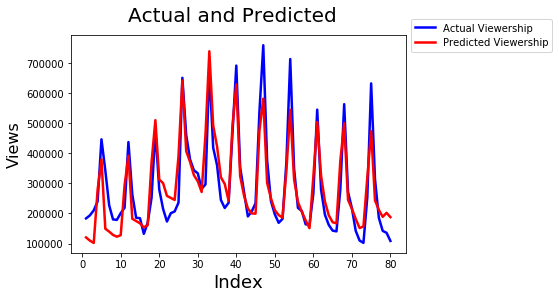

In [47]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show, color="blue", linewidth=2.5, linestyle="-",label="Actual Viewership")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-",label="Predicted Viewership")
fig.suptitle('Actual and Predicted', fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.xlabel('Index', fontsize=18)                
plt.ylabel('Views', fontsize=16);                        

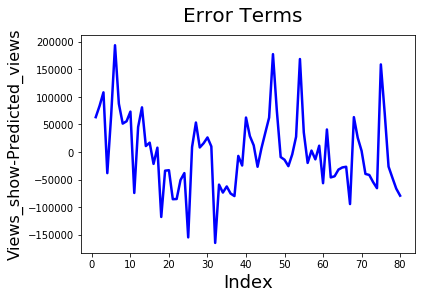

In [48]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)            
plt.xlabel('Index', fontsize=18)                    
plt.ylabel('Views_show-Predicted_views', fontsize=16);             

#### Making predictions using lm6

In [49]:
# Making predictions using the model
X = media[['weekend','Character_A','Visitors']]
X = sm.add_constant(X)
Predicted_views = lm_6.predict(X)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

In [51]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 9815432480.451523
r_square_value : 0.585873408097934


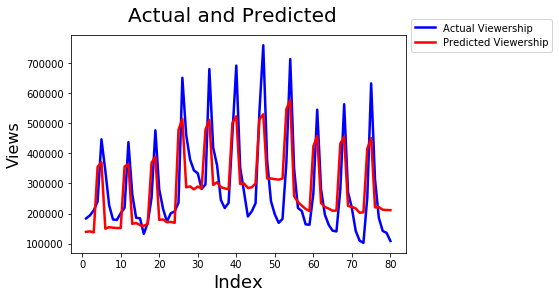

In [52]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show, color="blue", linewidth=2.5, linestyle="-",label="Actual Viewership")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-",label="Predicted Viewership")
fig.suptitle('Actual and Predicted', fontsize=20)  
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.xlabel('Index', fontsize=18)                            
plt.ylabel('Views', fontsize=16);                  

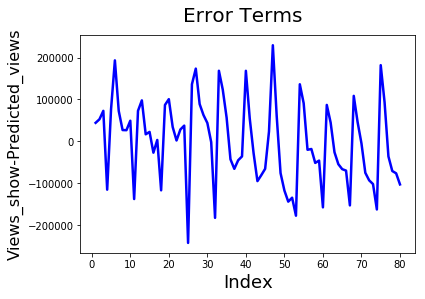

In [53]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)        
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('Views_show-Predicted_views', fontsize=16);               